# Quantum Algorithms 

We will finally start putting gates and circuits together to actually do something! 

We will however need to first learn about our first (and probably most important) multiqubit gate. 

The Controlled Not gate also known as CNOT and CX is a multi qubit gate. 

It has two inputs, a control qubit and a target qubit. 

When the control qubit is $|0\rangle$ then the target qubit remains unchanged. 

When the control qubit is $|1\rangle$ then the target qubit has the NOT or X gate applied to it. So if the control is qubit is $|1\rangle$ and the target is $|0\rangle$ then the output is control qubit $|1\rangle$ and target qubit $|1\rangle$. We sometimes denote control qubits with subscript 'c' and target qubits with subscript 't'.

Here are the possible inputs and corresponding outputs,

 Input                         | Output After $CX$
                         :---: | :---:
 $|0\rangle_c |0\rangle_t$   |  $|0\rangle_c |0\rangle_t$   
 $|0\rangle_c |1\rangle_t$   |  $|0\rangle_c |1\rangle_t$
 $|1\rangle_c |0\rangle_t$   |  $|1\rangle_c |1\rangle_t$
 $|1\rangle_c |1\rangle_t$   |  $|1\rangle_c |0\rangle_t$



Now lets take a look at how we use the CNOT in Qiskit! 



## Imports ( do not forget! ) 

In [1]:
from qiskit import * # this means that from the qiskit package
                     # import ALL functionality(*)
    
# we also want to see our results in insightful ways through graphs! 
from qiskit.visualization import * # bloch sphere graphs, bar graphs for measurements 

# We also need to import the simulators that we will use to make measurements

S_simulator=Aer.backends(name='statevector_simulator')[0] # allows you to simulate statevectors
M_simulator=Aer.backends(name='qasm_simulator')[0] # allows you to simulate measurements

## Multiqubit circuit and CNOT gate 

In [2]:
# make a quantum circuit with two qubits and two classical bits 

qc= QuantumCircuit(2,2)

# Initialize first qubit to |1> so that we can see CNOT (cx) do something 
one = [0,1] 
qc.initialize(one, 0)


# print out initial state to confirm that something happens when we use our gate! 
initial_state=execute(qc, S_simulator).result().get_statevector()
print('Initial state: ', initial_state)

# use the Cx gate, first qubit as control and second qubit as target
qc.cx(0,1)

# print out results! 
state_after_gate= execute(qc, S_simulator).result().get_statevector()
print('state after CX gate: ', state_after_gate)

Initial state:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
state after CX gate:  [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


## Understanding Multiqubit readout

Let us review what are print out from the previous cell was: 

Initial state:  [0.+0.j 1.+0.j 0.+0.j 0.+0.j]

state after CX gate:   [0.+0.j 0.+0.j 0.+0.j 1.+0.j] 

What does this readout mean? 

Before we saw that when we printed out the statevector for single qubit circuits we would get something like this: 

[0.+0.j 1.+0.j]

This gives us the probabilty amplitude of each possible state in the system, in the single qubit case here we see we have a probability amplitude of 0 for the $|0\rangle$ state and a probability amplitude of 1 for the $|1\rangle$ state. 

In the 2 qubits case the entries in the statevector list are probability amplitudes for the following states of the total space of qubit a and b ( a is the first and b is the second qubit): 


[ $|0\rangle_a$ $0\rangle_b$ , $|1\rangle_a$ $0\rangle_b$ , $|0\rangle_a$ $1\rangle_b$ , $|1\rangle_a$ $1\rangle_b$]

Here we can see that we initilaized our qubit in the $|1\rangle_a$ $0\rangle_b$ state and after $CX$ we get the $|1\rangle_a$ $1\rangle_b$ state. Our CNOT works exactly as expected! 

## Deutsch-Jozsa Algorithm 

Essentialy we take a black box function, we put in some inputs and get out some outputs and need to use these to guess whether our function is balanced or function. Our function takes a 0 or 1 and spits out a 0 or 1. 
If the fucntion is constant it will always give out a zero or always give out a one. If the function is balanced it will output zero as much as one. 

Constant | Balanced
---|---
f(0) = f(1) | f(0) $\neq$ f(1)

The function we can use is something like this 

$$ U_f |x\rangle|y\rangle = |x\rangle|y \bigoplus f(x)\rangle$$

where $\bigoplus$ is modular addition 2. That is, you add two numbers a and b, and we fit them into a ring of 2, any sum thats a multiple of 2 is 0 and any sum that is not a multiple of 2 is 1. 

#### Examples of mod 2 addition

$ 0 \bigoplus 1 = 1$

$ 1 \bigoplus 1 = 0$ 

$ 1 \bigoplus 2 = 1$ 

$ 2 \bigoplus 2 = 0$ 


The set up for the alogrithm is as follows: 


- Two qubits one in $|0\rangle$ and one in $|1\rangle$.

- Apply H to both qubits.

- Use Qubit that started in $|0\rangle$ as control qubit and other that started in $|1\rangle$ as the target qubit for the black box function $U_f$, if control is $|0\rangle$ then  apply $U_f$, otherwise do nothing. 

- Apply H to the control qubit and then measure.

- If the first qubit is measured to be $|0\rangle$ we have a constant function and if it is measured to be $|1\rangle$ we have a balanced function. 


For DJ to work the last qubit will start in the $|1\rangle$ state this means that after the first $H$ gate we will know that the bottom qubit is always in the minus state. 

The CX gate is a perfect substitute for our balanced $U_f$! 


### Balanced

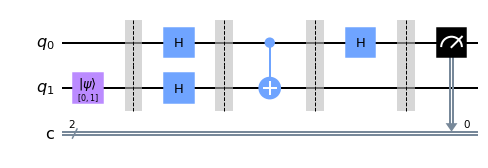

In [3]:
# example of DJ algorithm (CX for balanced)

# make circuit
dj = QuantumCircuit(2,2)

# Initialize second qubit
one=[0,1]
dj.initialize(one, 1)

# we use barries to seperate steps 
dj.barrier()

# Apply H gates 
dj.h(0)
dj.h(1)

dj.barrier()

# Use cx as Uf 
dj.cx(0,1)

dj.barrier()

dj.h(0)

dj.barrier()

dj.measure(0,0)

dj.draw(output='mpl')



Lets get our results from balanced

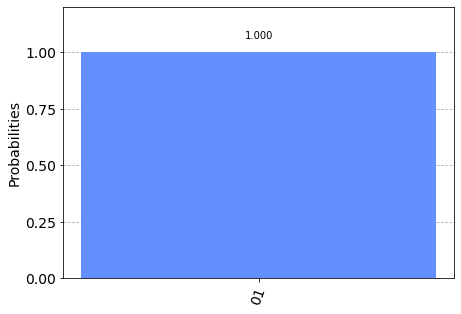

In [4]:
plot_histogram(execute(dj, M_simulator).result().get_counts())

### Our results! 

Take a look at our results, it says that we got the $|01\rangle$ state. BUT Qiskit prints in little endian encoding, this means that qiskit reads from the last qubit to the first (left to right respectfully).

So when we see 01 in our results that means that our circuit is actually in the $|10\rangle$ state! which means our first qubit is in the $|1\rangle$ state which means that our function is balanced! 



### Constant 

constant is really simple we could do nothing and get our desired result! 

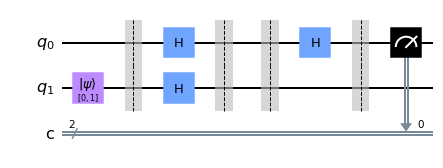

In [5]:
# example of DJ algorithm (CX for balanced)

# make circuit
dj = QuantumCircuit(2,2)

# Initialize second qubit
one=[0,1]
dj.initialize(one, 1)

# we use barries to seperate steps 
dj.barrier()

# Apply H gates 
dj.h(0)
dj.h(1)

dj.barrier()

# do nothing for constant function

dj.barrier()

dj.h(0)

dj.barrier()

dj.measure(0,0)

dj.draw(output='mpl')

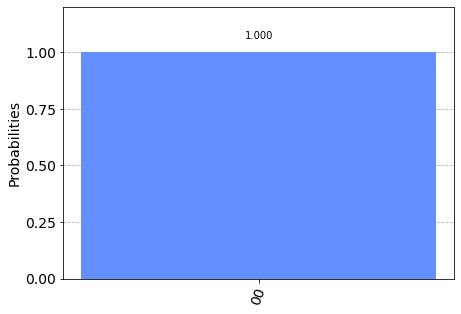

In [6]:
plot_histogram(execute(dj, M_simulator).result().get_counts())

Take a look we get a 0 in our first qubit which means our function was constant! 